<a href="https://colab.research.google.com/github/Mingen888/Computer-Vision/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Basic model built from Assignment 0

In [2]:
# To see plots "in-line" in your Notebook, you must use this command
%matplotlib inline


#Imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ReLU, Add, Activation, Input,GlobalAveragePooling2D, Dense
from keras import backend as K

from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint



batch_size = 100

num_classes = 100

epochs = 5

img_rows, img_cols = 32, 32



#Because there is "from keras.datasets import mnist" before, we can import both train and test sets directly
# the data, shuffled and split between tran and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode="fine")
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


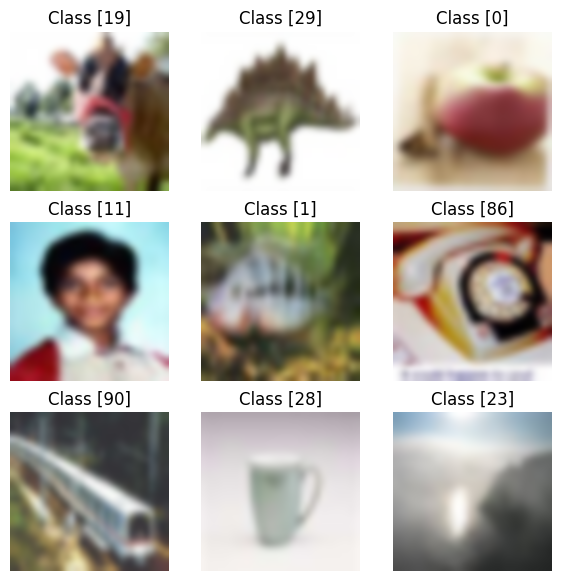

In [ ]:
#Take a look at some of the examples
for i in range(9):
  #subplot's index start from 1
  plt.subplot(3,3,i+1)
  plt.axis('off')
  plt.imshow(x_train[i],interpolation = 'bicubic')
  #{}是占位符
  plt.title("Class {}".format(y_train[i]))

In [3]:
#In order to make the format of image data consistent with the input
#format of deep learning model, ensure that the model can correctly process the input data.

if K.image_data_format() == 'channels_first':

  #reshape
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)

else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

In [4]:
'''
1. Convert the original uint8 (0–255 integer) image data to float32 (also a type of float).
2. Neural networks usually work better, faster, and more stable on floating point numbers (especially 32-bit floating point).
3. First convert int to float, then divide by 255 (because it was originally 0->255)

'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255


#Convert all train test y to one-hot encoding
#Required for all classification tasks

#Originally a single number representing class
#Because num_class is 10, it is defined at the beginning
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)
# 4. （ImageDataGenerator）
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

Attempt One: Simple Convolution Neuron Network

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.0190 - loss: 4.5276 - val_accuracy: 0.0640 - val_loss: 4.2570
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0686 - loss: 4.0828 - val_accuracy: 0.0821 - val_loss: 4.0946
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0989 - loss: 3.8786 - val_accuracy: 0.0927 - val_loss: 4.0135
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1212 - loss: 3.7372 - val_accuracy: 0.1124 - val_loss: 3.9026
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1343 - loss: 3.6586 - val_accuracy: 0.1238 - val_loss: 3.8586
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1492 - loss: 3.5663 - val_accuracy: 0.1830 - val_loss: 3.5933
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1591 - loss: 3.5085 - val_accuracy: 0.1835 - val_loss: 3.5629
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1715 - loss: 3.4355 - val_accuracy: 0

<Figure size 1200x500 with 0 Axes>

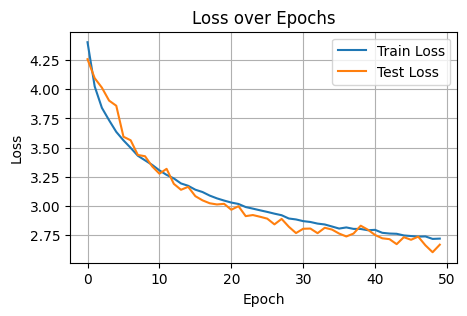

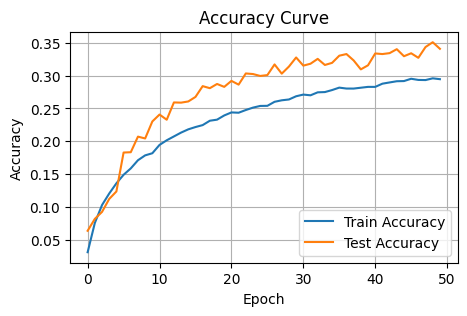

In [ ]:
#fitModel (kernelNum1, kernelNum2, kernelSize1, kernelSize2, pool_size1, pool_size2, DropoutValue1, DropValue2,epochNum)
def fitModel(kernelNum1, kernelNum2, kernelSize1, kernelSize2, pool_size1, pool_size2, DropValue1, DropValue2, epochNum):
    model = Sequential()
    #Convolution
    model.add(Conv2D(kernelNum1, (kernelSize1, kernelSize1), activation='relu', input_shape=input_shape))
    model.add(Conv2D(kernelNum2, (kernelSize2, kernelSize2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(pool_size1, pool_size1)))
    model.add(Dropout(DropValue1))
    model.add(Conv2D(kernelNum2, (kernelSize2, kernelSize2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(pool_size1, pool_size1)))

    #Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(DropValue1))
    model.add(Dense(100, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochNum,
                        verbose=1,
                        validation_data=(x_test, y_test))
    return model, history

#Call the function
model, history = fitModel(128, 64, 3, 3, 2, 2, 0.5, 0.5, 50)
# Draw a picture
plt.figure(figsize=(12, 5))

# Loss
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# Accuracy
plt.figure(figsize=(5,3))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()




Show some examples of correctly classified images AND incorrectly classified images. ​

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Number of correct predictions: 3408
Number of wrong predictions: 6592


Examples of correct predictions:


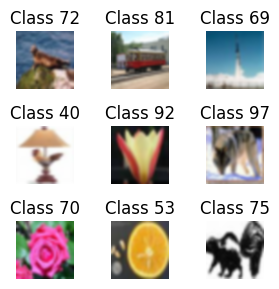



Examples of wrong predictions:


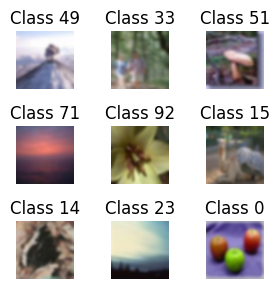

In [ ]:
import matplotlib.pyplot as plt

predictions = model.predict(x_test)
predicted_classes = predictions.argmax(axis=1)
# if y_test is one-hot format
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    true_classes = y_test.argmax(axis=1)
else:
    true_classes = y_test
correct_indices = [i for i in range(len(true_classes)) if predicted_classes[i] == true_classes[i]]
incorrect_indices = [i for i in range(len(true_classes)) if predicted_classes[i] != true_classes[i]]

print(f"Number of correct predictions: {len(correct_indices)}")
print(f"Number of wrong predictions: {len(incorrect_indices)}")
print("\n")
#Examples of correct predictions
plt.figure(figsize=(3,3))
print("Examples of correct predictions:")
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(x_test[correct_indices[i]], interpolation='bicubic')
    plt.title(f"Class {true_classes[correct_indices[i]]}")
plt.tight_layout()
plt.show()

print("\n")

#Examples of wrong predictions
plt.figure(figsize=(3,3))
print("Examples of wrong predictions:")
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(x_test[incorrect_indices[i]], interpolation='bicubic')
    plt.title(f"Class {true_classes[incorrect_indices[i]]}")
plt.tight_layout()
plt.show()

In [ ]:
#Failed to apply minimize method to get the values to produce minimum loss since the process takes to much time

'''
#Use "minimize" to minimize the loss value of test set
def miniFunc(x):
    # x is a list containing all hyperparameters
    kernelNum1 = int(x[0])
    kernelNum2 = int(x[1])
    kernelSize1 = int(x[2])
    kernelSize2 = int(x[3])
    pool_size1 = int(x[4])
    pool_size2 = int(x[5])
    DropoutValue1 = x[6]
    DropValue2 = x[7]

    return fitModel(kernelNum1, kernelNum2, kernelSize1, kernelSize2,
                    pool_size1, pool_size2, DropoutValue1, DropValue2, 5)



from scipy.optimize import minimize

# Initial Guess
x0 = [32, 64, 3, 3, 2, 2, 0.25, 0.5]

# Parameter boundary
bounds = [
    (16, 128),   # kernelNum1
    (16, 128),   # kernelNum2
    (2, 5),      # kernelSize1
    (2, 5),      # kernelSize2
    (2, 5),      # pool_size1
    (2, 5),      # pool_size2
    (0, 0.5),  # DropoutValue1
    (0, 0.5),  # DropValue2
]


result = minimize(miniFunc, x0=x0, bounds=bounds, method='L-BFGS-B')

# Output
print("Best params:", result.x)
print("Best loss:", result.fun)



'''







'\n#Use "minimize" to minimize the loss value of test set\ndef miniFunc(x):\n    # x is a list containing all hyperparameters\n    kernelNum1 = int(x[0])\n    kernelNum2 = int(x[1])\n    kernelSize1 = int(x[2])\n    kernelSize2 = int(x[3])\n    pool_size1 = int(x[4])\n    pool_size2 = int(x[5])\n    DropoutValue1 = x[6]\n    DropValue2 = x[7]\n\n    return fitModel(kernelNum1, kernelNum2, kernelSize1, kernelSize2,\n                    pool_size1, pool_size2, DropoutValue1, DropValue2, 5)\n\n\n\nfrom scipy.optimize import minimize\n\n# Initial Guess\nx0 = [32, 64, 3, 3, 2, 2, 0.25, 0.5]\n\n# Parameter boundary\nbounds = [\n    (16, 128),   # kernelNum1\n    (16, 128),   # kernelNum2\n    (2, 5),      # kernelSize1\n    (2, 5),      # kernelSize2\n    (2, 5),      # pool_size1\n    (2, 5),      # pool_size2\n    (0, 0.5),  # DropoutValue1\n    (0, 0.5),  # DropValue2\n]\n\n\nresult = minimize(miniFunc, x0=x0, bounds=bounds, method=\'L-BFGS-B\')\n\n# Output\nprint("Best params:", result.x

2. ResNet18

Input layer -> Convolution -> Batch Normalization -> 8 residual blocks (Number of filters: 64x2, 128x2, 256x2, 512x2 ) -> Global Average Pooling -> one fully connected layer -> Output

In [ ]:
# 1. Resnet Function
def resnet18():
  inputs = Input(shape=(32,32,3))
  x = Conv2D(64, kernel_size=3, strides=1, padding='same', kernel_regularizer=regularizers.l2(1e-4))(inputs)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  # Stage 1: 64 filters, 2 residual blocks, stride=1
  x = resBlock(x, 64, stride=1)
  x = resBlock(x, 64, stride=1)

  # Stage 2: 128 filters, 2 residual blocks, first block stride=2
  x = resBlock(x, 128, stride=2)
  x = resBlock(x, 128, stride=1)

  # Stage 3: 256 filters, 2 residual blocks, first block stride=2
  x = resBlock(x, 256, stride=2)
  x = resBlock(x, 256, stride=1)

  # Stage 4: 512 filters, 2 residual blocks, first block stride=2
  x = resBlock(x, 512, stride=2)
  x = resBlock(x, 512, stride=1)

  x = GlobalAveragePooling2D()(x)
  x = Dropout(0.5)(x)
  #output layer
  outputs = Dense(100, activation='softmax', kernel_regularizer=regularizers.l2(1e-4))(x)
  model = Model(inputs=inputs, outputs=outputs)
  return model


# 2. Residual block
def resBlock(initialValue1, numKernel, stride = 1):

#Store the output from the last layer
  x = initialValue1

# 1. Convolution+BatchNormalization+activation
  initialValue = Conv2D(numKernel, kernel_size=3, strides=stride, padding='same', kernel_regularizer=regularizers.l2(1e-4))(initialValue1)
  initialValue = BatchNormalization()(initialValue)
  initialValue = Activation('relu')(initialValue)

# 2. Convolution+BatchNormalization
  initialValue = Conv2D(numKernel, kernel_size=3, strides=1, padding='same', kernel_regularizer=regularizers.l2(1e-4))(initialValue)
  initialValue = BatchNormalization()(initialValue)

# 3. F(x)+initialValue
# Change the size of initialValue to fit the size of the latest feature map
  if stride != 1:

    #If their sizes are different, do convolution one time
    #Use numKernel, so that they can have the same thickness
    '''Use stride, so that they can have the same width and height
    since when stride = 1, by using padding = 'same', the size of feature map won't change'''
    #padding = 'same': Size: celling value of "size of initialValue / stride"

    x = Conv2D(numKernel, kernel_size=1, strides=stride, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = BatchNormalization()(x)


  #Update the latest feature map
  initialValue = Add()([initialValue, x])
  initialValue = Activation('relu')(initialValue)
  ##Return the latest feature map
  return initialValue







In [ ]:
# After we built our model, it's time to train it
model = resnet18()

#Set the ways to train our model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#start training
result = model.fit(
    datagen.flow(x_train, y_train, batch_size=100),  # datagen
    validation_data=(x_test, y_test),
    epochs=50,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0524 - loss: 4.9754
Epoch 1: val_loss did not improve from 1.81729
500/500 ━━━━━━━━━━━━━━━━━━━━ 55s 63ms/step - accuracy: 0.0525 - loss: 4.9746 - val_accuracy: 0.0972 - val_loss: 4.3328 - learning_rate: 0.0010
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1497 - loss: 3.9375
Epoch 2: val_loss did not improve from 1.81729
500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.1498 - loss: 3.9373 - val_accuracy: 0.1627 - val_loss: 3.9587 - learning_rate: 0.0010
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2293 - loss: 3.4732
Epoch 3: val_loss did not improve from 1.81729
500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.2293 - loss: 3.4730 - val_accuracy: 0.1480 - val_loss: 4.5845 - learning_rate: 0.0010
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2984 - loss: 3.1691
Epoch 4: val_loss did not improve from 1.81729
500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 54

500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.7866 - loss: 1.2904 - val_accuracy: 0.6826 - val_loss: 1.7347 - learning_rate: 2.5000e-04
Epoch 30/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8057 - loss: 1.2013
Epoch 30: val_loss did not improve from 1.73469
500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.8057 - loss: 1.2014 - val_accuracy: 0.6672 - val_loss: 1.8112 - learning_rate: 2.5000e-04
Epoch 31/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8145 - loss: 1.1584
Epoch 31: val_loss did not improve from 1.73469
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - accuracy: 0.8145 - loss: 1.1584 - val_accuracy: 0.6738 - val_loss: 1.7747 - learning_rate: 2.5000e-04
Epoch 32/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8199 - loss: 1.1324
Epoch 32: val_loss did not improve from 1.73469
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - accuracy: 0.8199 - loss: 1.1325 - val_accuracy: 0.6651 - val_loss: 1.8289 - learning_rate: 2.5000e-04
Epoc

500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 53ms/step - accuracy: 0.8658 - loss: 0.9486 - val_accuracy: 0.6953 - val_loss: 1.6944 - learning_rate: 1.2500e-04
Epoch 37/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8713 - loss: 0.9218
Epoch 37: val_loss improved from 1.69439 to 1.66035, saving model to best_resnet18_cifar100.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.8713 - loss: 0.9219 - val_accuracy: 0.7085 - val_loss: 1.6604 - learning_rate: 1.2500e-04
Epoch 38/50
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8791 - loss: 0.8920
Epoch 38: val_loss did not improve from 1.66035
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - accuracy: 0.8791 - loss: 0.8920 - val_accuracy: 0.6926 - val_loss: 1.7428 - learning_rate: 1.2500e-04
Epoch 39/50
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8824 - loss: 0.8783
Epoch 39: val_loss did not improve from 1.66035
500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 53ms/step - accuracy: 0.8824 - loss: 0.8783 - val_accuracy: 0.6942 - val_loss: 1.7158 - learning_rate: 1.2500e-04
Epoch 40/50
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8865 - loss: 0.8613
Epoch 40: val_loss did not improve from 1.66035
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.8864 - loss: 0.8614 - val_accuracy: 0.7083 - val_loss: 1.6645 - learning_rate: 1.2500e-04
Epoc

500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.9028 - loss: 0.7942 - val_accuracy: 0.7105 - val_loss: 1.6581 - learning_rate: 6.2500e-05
Epoch 44/50
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9136 - loss: 0.7594
Epoch 44: val_loss did not improve from 1.65815
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - accuracy: 0.9136 - loss: 0.7594 - val_accuracy: 0.7068 - val_loss: 1.6922 - learning_rate: 6.2500e-05
Epoch 45/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9165 - loss: 0.7470
Epoch 45: val_loss did not improve from 1.65815
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - accuracy: 0.9165 - loss: 0.7470 - val_accuracy: 0.7048 - val_loss: 1.6751 - learning_rate: 6.2500e-05
Epoch 46/50
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9184 - loss: 0.7347
Epoch 46: val_loss did not improve from 1.65815
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.9183 - loss: 0.7347 - val_accuracy: 0.7021 - val_loss: 1.7195 - learning_rate: 6.2500e-05
Epoc

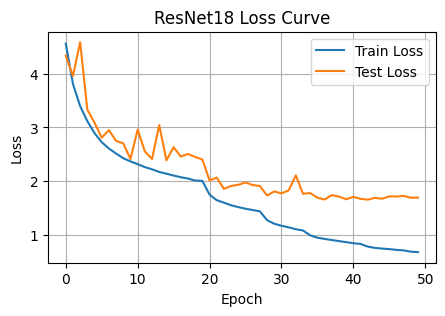

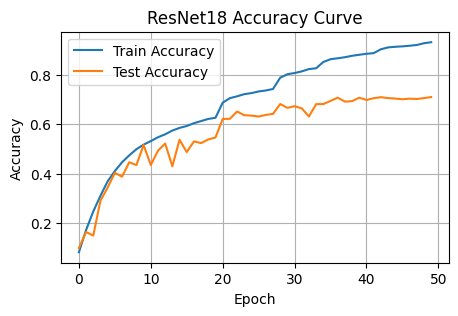

In [ ]:
# Loss Curve
plt.figure(figsize=(5,3))
plt.plot(result.history['loss'], label='Train Loss')
plt.plot(result.history['val_loss'], label='Test Loss')
plt.title('ResNet18 Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy Curve
plt.figure(figsize=(5,3))
plt.plot(result.history['accuracy'], label='Train Accuracy')
plt.plot(result.history['val_accuracy'], label='Test Accuracy')
plt.title('ResNet18 Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
Number of correct predictions: 7105
Number of wrong predictions: 2895


Examples of correct predictions:


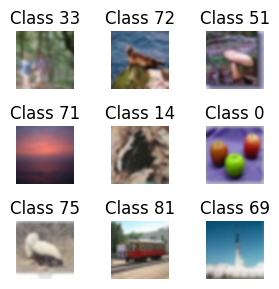



Examples of wrong predictions:


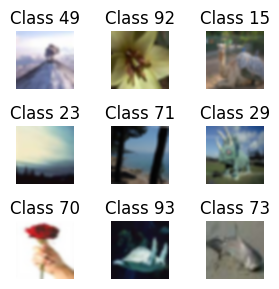

In [ ]:
#Show some correct and incorrect prediction examples
# Get predictions
predictions = model.predict(x_test)
predicted_classes = predictions.argmax(axis=1)

# if y_test is one-hot format
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    true_classes = y_test.argmax(axis=1)
else:
    true_classes = y_test

# Generate correct_indices & incorrect_indices
correct_indices = [i for i in range(len(true_classes)) if predicted_classes[i] == true_classes[i]]
incorrect_indices = [i for i in range(len(true_classes)) if predicted_classes[i] != true_classes[i]]

import matplotlib.pyplot as plt

print(f"Number of correct predictions: {len(correct_indices)}")
print(f"Number of wrong predictions: {len(incorrect_indices)}")
print("\n")

plt.figure(figsize=(3,3))
print("Examples of correct predictions:")
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(x_test[correct_indices[i]], interpolation='bicubic')
    plt.title(f"Class {true_classes[correct_indices[i]]}")
plt.tight_layout()
plt.show()

print("\n")

plt.figure(figsize=(3,3))
print("Examples of wrong predictions:")
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(x_test[incorrect_indices[i]], interpolation='bicubic')
    plt.title(f"Class {true_classes[incorrect_indices[i]]}")
plt.tight_layout()
plt.show()

3. Resnet34

In [5]:
# 1. Resnet Function
def resnet18_original():
  inputs = Input(shape=(32,32,3))
  x = Conv2D(64, kernel_size=3, strides=1, padding='same')(inputs)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  # Stage 1: 64 filters, 2 residual blocks, stride=1
  x = resBlock(x, 64, stride=1)
  x = resBlock(x, 64, stride=1)

  # Stage 2: 128 filters, 2 residual blocks, first block stride=2
  x = resBlock(x, 128, stride=2)
  x = resBlock(x, 128, stride=1)

  # Stage 3: 256 filters, 2 residual blocks, first block stride=2
  x = resBlock(x, 256, stride=2)
  x = resBlock(x, 256, stride=1)

  # Stage 4: 512 filters, 2 residual blocks, first block stride=2
  x = resBlock(x, 512, stride=2)
  x = resBlock(x, 512, stride=1)

  x = GlobalAveragePooling2D()(x)
  x = Dropout(0.5)(x)
  #output layer
  outputs = Dense(100, activation='softmax')(x)
  model = Model(inputs=inputs, outputs=outputs)
  return model


# 2. Residual block
def resBlock(initialValue1, numKernel, stride = 1):

#Store the output from the last layer
  x = initialValue1

# 1. Convolution+BatchNormalization+activation
  initialValue = Conv2D(numKernel, kernel_size=3, strides=stride, padding='same')(initialValue1)
  initialValue = BatchNormalization()(initialValue)
  initialValue = Activation('relu')(initialValue)

# 2. Convolution+BatchNormalization
  initialValue = Conv2D(numKernel, kernel_size=3, strides=1, padding='same')(initialValue)
  initialValue = BatchNormalization()(initialValue)

# 3. F(x)+initialValue
# Change the size of initialValue to fit the size of the latest feature map
  if stride != 1:

    #If their sizes are different, do convolution one time
    #Use numKernel, so that they can have the same thickness
    '''Use stride, so that they can have the same width and height
    since when stride = 1, by using padding = 'same', the size of feature map won't change'''
    #padding = 'same': Size: celling value of "size of initialValue / stride"

    x = Conv2D(numKernel, kernel_size=1, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)


  #Update the latest feature map
  initialValue = Add()([initialValue, x])
  initialValue = Activation('relu')(initialValue)
  ##Return the latest feature map
  return initialValue

In [6]:
# After we built our model, it's time to train it
model = resnet18_original()

#Set the ways to train our model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#start training
result = model.fit(x_train, y_train,batch_size=100,epochs=50,validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.0683 - loss: 4.4292 - val_accuracy: 0.1109 - val_loss: 3.9287
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.1962 - loss: 3.2689 - val_accuracy: 0.2073 - val_loss: 3.2785
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.3193 - loss: 2.6227 - val_accuracy: 0.3425 - val_loss: 2.5777
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.4195 - loss: 2.1315 - val_accuracy: 0.3249 - val_loss: 2.6721
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.5037 - loss: 1.7847 - val_accuracy: 0.4303 - val_loss: 2.1537
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.5876 - loss: 1.4273 - val_accuracy: 0.4486 - val_loss: 2.0974
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.6593 - loss: 1.1518 - val_accuracy: 0.4931 - val_loss: 1.9351
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7373 - loss: 0.8738 - val_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
Number of correct predictions: 5528
Number of wrong predictions: 4472


Examples of correct predictions:


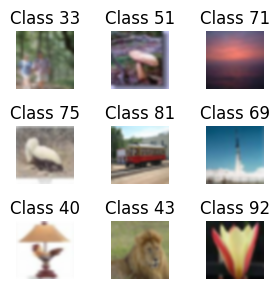



Examples of wrong predictions:


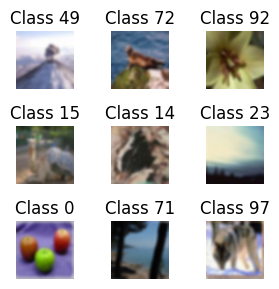

In [7]:
#Show some correct and incorrect prediction examples
# Get predictions
predictions = model.predict(x_test)
predicted_classes = predictions.argmax(axis=1)

# if y_test is one-hot format
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    true_classes = y_test.argmax(axis=1)
else:
    true_classes = y_test

# Generate correct_indices & incorrect_indices
correct_indices = [i for i in range(len(true_classes)) if predicted_classes[i] == true_classes[i]]
incorrect_indices = [i for i in range(len(true_classes)) if predicted_classes[i] != true_classes[i]]

import matplotlib.pyplot as plt

print(f"Number of correct predictions: {len(correct_indices)}")
print(f"Number of wrong predictions: {len(incorrect_indices)}")
print("\n")

plt.figure(figsize=(3,3))
print("Examples of correct predictions:")
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(x_test[correct_indices[i]], interpolation='bicubic')
    plt.title(f"Class {true_classes[correct_indices[i]]}")
plt.tight_layout()
plt.show()

print("\n")

plt.figure(figsize=(3,3))
print("Examples of wrong predictions:")
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(x_test[incorrect_indices[i]], interpolation='bicubic')
    plt.title(f"Class {true_classes[incorrect_indices[i]]}")
plt.tight_layout()
plt.show()

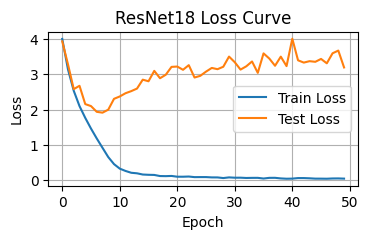

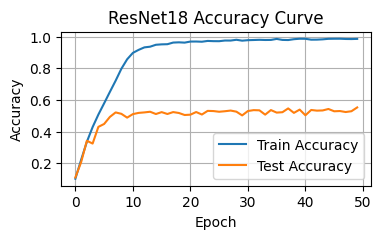

In [8]:
# Loss Curve
plt.figure(figsize=(4, 2))
plt.plot(result.history['loss'], label='Train Loss')
plt.plot(result.history['val_loss'], label='Test Loss')
plt.title('ResNet18 Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy Curve
plt.figure(figsize=(4, 2))
plt.plot(result.history['accuracy'], label='Train Accuracy')
plt.plot(result.history['val_accuracy'], label='Test Accuracy')
plt.title('ResNet18 Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()